In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
from tqdm import tqdm


import warnings
warnings.filterwarnings('ignore')

import os
from matplotlib.colors import LinearSegmentedColormap



In [2]:
total_all_plane = 536576
total_utax = 126976



data = pd.read_parquet('./Data/FullData.parquet')

numbers = [308612, 306788, 306327, 309395, 308019, 308213, 308021, 307299, 306328, 309394]

data = data.loc[data.RunNumber.isin(numbers)]

data.RunNumber = data.RunNumber.astype('category')

data = data[data.Sector.str.startswith('UTaX')]


# data = data[['RunNumber','Sector','Staves','Rows','PedestalValue']]

data = data[['RunNumber','Staves','Rows','PedestalValue']]

print(data.shape)
data.head()

(1269760, 4)


,RunNumber,Staves,Rows,PedestalValue
0,308612,1C,S4B,-1
1,308612,1C,S4B,-2
2,308612,1C,S4B,-2
3,308612,1C,S4B,-1
4,308612,1C,S4B,-1


In [3]:
#Use Signal to Noise Ratio Plots may be clustering
# Show plots for gaussians for time series.
# Check Streamlit for Dashboard Preparation
# Outlier counter
# How many dead pixels.
# Do a  modeling where the model takes 15 model as input for the next one, ingest these to a  new model where it discard data 1 and go for the next 15, including 16 from the last one.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1269760 entries, 0 to 331775
Data columns (total 4 columns):
 #   Column         Non-Null Count    Dtype   
---  ------         --------------    -----   
 0   RunNumber      1269760 non-null  category
 1   Staves         1269760 non-null  object  
 2   Rows           1269760 non-null  object  
 3   PedestalValue  1269760 non-null  int64   
dtypes: category(1), int64(1), object(2)
memory usage: 40.0+ MB


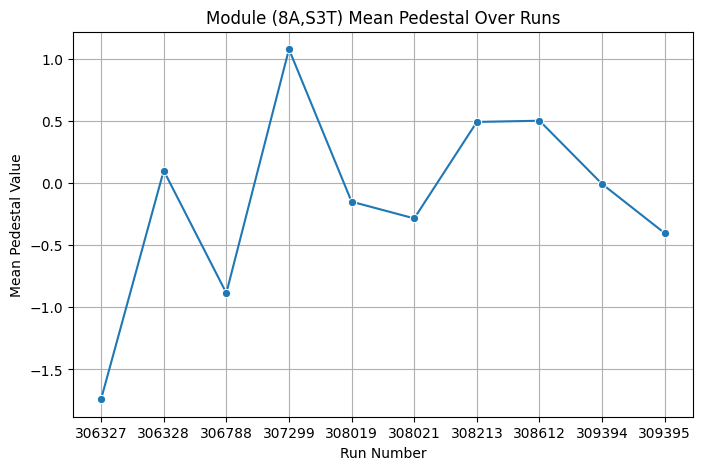

In [5]:
mean_pedestal = data.groupby(['RunNumber','Staves','Rows'])['PedestalValue'].mean().reset_index()

# Let's see how channel (Stave=1C, Row=S4B) evolves in time:
specific_module = mean_pedestal[(mean_pedestal['Staves']=='8A') & (mean_pedestal['Rows']=='S3T')]

plt.figure(figsize=(8,5))
sns.lineplot(x= specific_module['RunNumber'].astype('str'), y=specific_module['PedestalValue'], marker='o',linestyle='-')
plt.title('Module (8A,S3T) Mean Pedestal Over Runs')
plt.xlabel('Run Number')
plt.ylabel('Mean Pedestal Value')
plt.grid(True)
plt.show()

In [6]:
# mean_pedestal[mean_pedestal['RunNumber']==308612]['PedestalValue'].to_numpy().reshape(16,16)

In [7]:

from scipy import stats



mean_pedestal['PedestalValue'] = mean_pedestal['PedestalValue'].fillna(0)


numbers = [308612, 306788, 306327, 309395, 308019, 308213, 308021, 307299, 306328, 309394]


data1 = mean_pedestal[mean_pedestal['RunNumber']==308612]['PedestalValue'].values

for i in numbers:
    print(f'Run: {i}')
    # print(i)

    data2 = mean_pedestal[mean_pedestal['RunNumber']==i]['PedestalValue'].values

    # Perform the Kolmogorov-Smirnov two-sample test
    ks_statistic, p_value = stats.ks_2samp(data1, data2)

    print(f"KS Statistic: {ks_statistic}")
    print(f"P-value: {p_value}")

    # Interpret the results
    alpha = 0.05
    if p_value < alpha:
        print("The two distributions are significantly different.")
    else:
        print("The two distributions are not significantly different.")

    print('---')
    # break

Run: 308612
KS Statistic: 0.0
P-value: 1.0
The two distributions are not significantly different.
---
Run: 306788
KS Statistic: 0.30859375
P-value: 3.633414131125328e-11
The two distributions are significantly different.
---
Run: 306327
KS Statistic: 0.234375
P-value: 1.4087570293389547e-06
The two distributions are significantly different.
---
Run: 309395
KS Statistic: 0.2265625
P-value: 3.5950283212941483e-06
The two distributions are significantly different.
---
Run: 308019
KS Statistic: 0.26171875
P-value: 4.088683979943013e-08
The two distributions are significantly different.
---
Run: 308213
KS Statistic: 0.03515625
P-value: 0.9975131965823585
The two distributions are not significantly different.
---
Run: 308021
KS Statistic: 0.24609375
P-value: 3.248264931454658e-07
The two distributions are significantly different.
---
Run: 307299
KS Statistic: 0.26953125
P-value: 1.3796687481038473e-08
The two distributions are significantly different.
---
Run: 306328
KS Statistic: 0.13671875

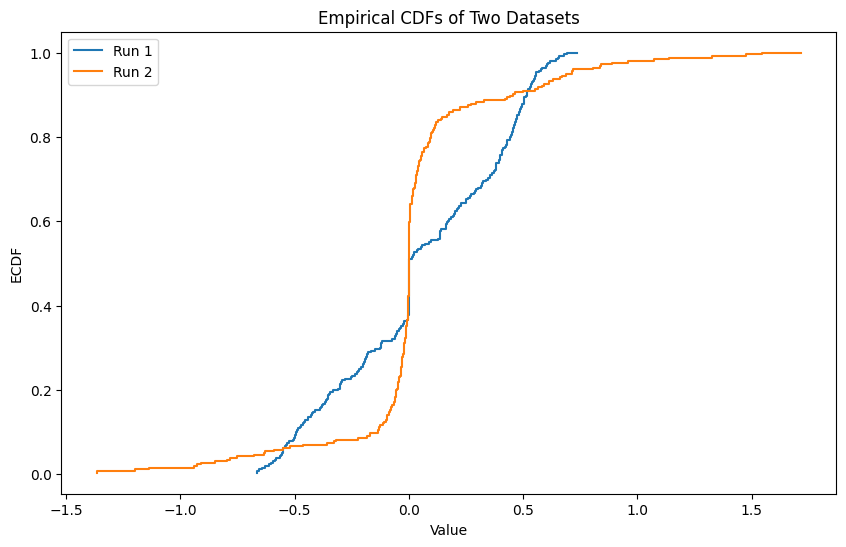

In [8]:
# Plotting the ECDFs
def plot_ecdf(data, label):
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    plt.step(x, y, label=label)

plt.figure(figsize=(10, 6))
plot_ecdf(data1, 'Run 1')
plot_ecdf(data2, 'Run 2')

plt.title('Empirical CDFs of Two Datasets')
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.legend()
plt.show()